In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [2]:
traindata= pd.read_csv('customer_train.csv', encoding='utf-8-sig', index_col=0)
traindata

,CustomerID,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,AveMonthSpend
0,11000,Rockhampton,Queensland,Australia,Bachelors,Professional,M,M,0,0,2,137947,32,89
1,11001,Seaford,Victoria,Australia,Bachelors,Professional,M,S,1,3,3,101141,33,117
2,11002,Hobart,Tasmania,Australia,Bachelors,Professional,M,M,1,3,3,91945,33,123
3,11003,North Ryde,New South Wales,Australia,Bachelors,Professional,F,S,1,0,0,86688,30,50
4,11004,Wollongong,New South Wales,Australia,Bachelors,Professional,F,S,4,5,5,92771,30,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,29478,Stoke-on-Trent,England,United Kingdom,Graduate Degree,Clerical,M,S,0,0,3,45986,39,65
16745,29479,Versailles,Yveline,France,Graduate Degree,Clerical,M,M,0,0,1,80049,40,77
16746,29480,London,England,United Kingdom,Graduate Degree,Clerical,F,S,0,0,3,60417,38,48
16747,29481,Hof,Bayern,Germany,Graduate Degree,Clerical,M,S,0,0,3,66653,38,65


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

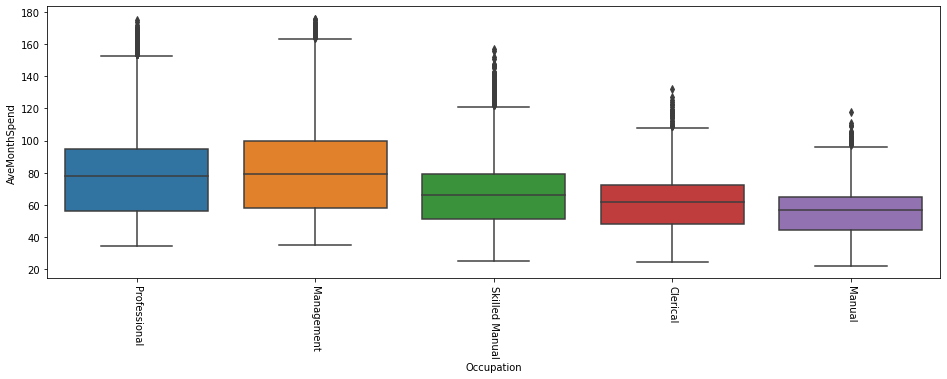

In [4]:
#Occupation v.s AveMonthSpend
plt.figure(figsize=(16,5))
plt.xticks(rotation = -90)
sns.boxplot(x='Occupation',y='AveMonthSpend',data=traindata)

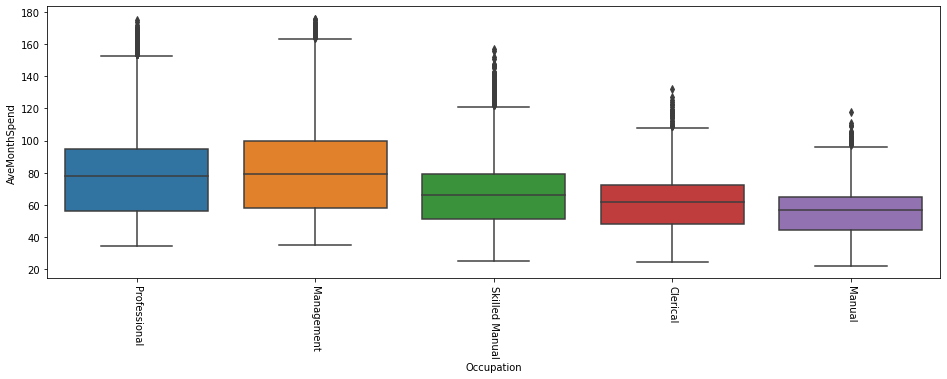

In [5]:
#Occupation v.s AveMonthSpend
plt.figure(figsize=(16,5))
plt.xticks(rotation = -90)
sns.boxplot(x='Occupation',y='AveMonthSpend',data=traindata)

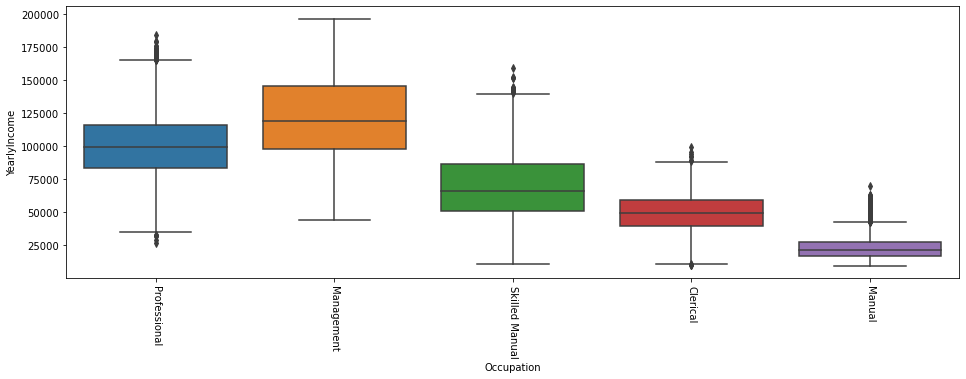

In [6]:
#YearlyIncome v.s AveMonthSpend
plt.figure(figsize=(16,5))
plt.xticks(rotation = -90)
sns.boxplot(x='Occupation',y='YearlyIncome',data=traindata)

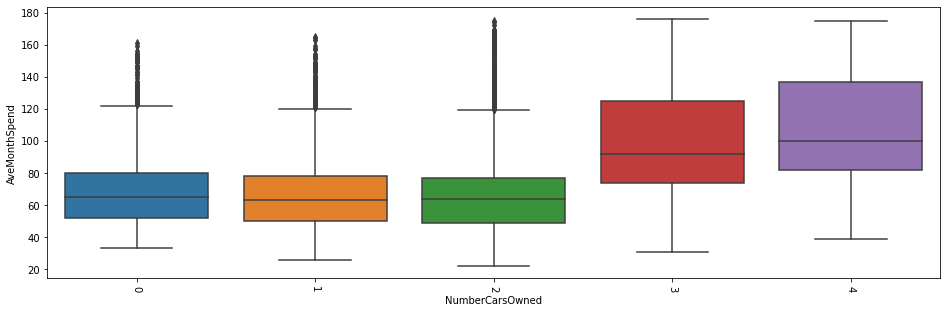

In [7]:
#NumberCarsOwned v.s AveMonthSpend
plt.figure(figsize=(16,5))
plt.xticks(rotation = -90)
sns.boxplot(x='NumberCarsOwned',y='AveMonthSpend',data=traindata)

In [8]:
traindata[['YearlyIncome','AveMonthSpend']].corr()

,YearlyIncome,AveMonthSpend
YearlyIncome,1.000000,0.607859
AveMonthSpend,0.607859,1.000000


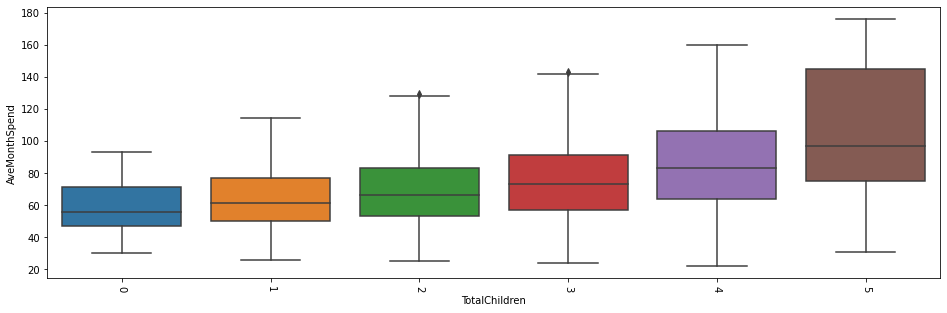

In [9]:
#TotalChildren v.s AveMonthSpend
plt.figure(figsize=(16,5))
plt.xticks(rotation = -90)
sns.boxplot(x='TotalChildren',y='AveMonthSpend',data=traindata)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [11]:
y = traindata['AveMonthSpend']
cols = ['NumberCarsOwned', 'NumberChildrenAtHome','TotalChildren', 'YearlyIncome', 'Age' ]
X = traindata[cols]
 # 特徵標準化
    
X_std = StandardScaler().fit_transform(X)
X_std

array([[-1.31730877, -0.65471275, -0.00310576,  1.50532001, -0.39590744],
       [-0.43869356,  1.32664422,  0.59114179,  0.57862621, -0.30695558],
       [-0.43869356,  1.32664422,  0.59114179,  0.34709124, -0.30695558],
       ...,
       [-1.31730877, -0.65471275,  0.59114179, -0.44671417,  0.13780377],
       [-1.31730877, -0.65471275,  0.59114179, -0.28970546,  0.13780377],
       [-1.31730877, -0.65471275,  0.59114179, -0.46386024,  0.22675564]])

In [12]:
# 特徵篩選 
selector = SelectFromModel(estimator=LinearRegression(),threshold= 'mean').fit(X_std,y)
selector.estimator_.coef_ , selector.get_support() , selector.threshold

(array([-1.05450214, 16.0773549 ,  0.31778476, 11.17661623, -1.45062731]),
 array([False,  True, False,  True, False]),
 'mean')

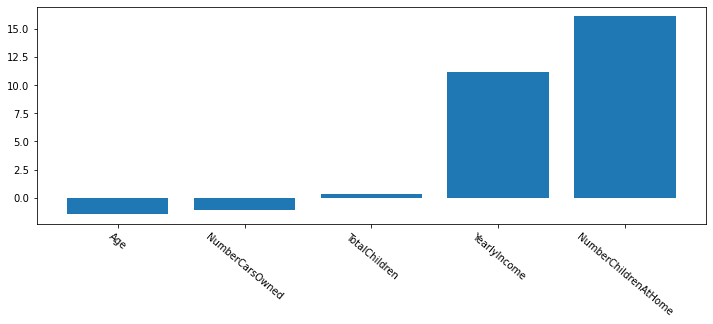

,coef,feature
4,-1.450627,Age
0,-1.054502,NumberCarsOwned
2,0.317785,TotalChildren
3,11.176616,YearlyIncome
1,16.077355,NumberChildrenAtHome


In [13]:

feature_sort = pd.DataFrame(selector.estimator_.coef_,columns=['coef'])
feature_sort['feature']=cols

feature_sort = feature_sort.sort_values(by = 'coef')

plt.figure(figsize=(12, 4))
plt.bar(feature_sort['feature'] , feature_sort['coef'])
plt.xticks(rotation=-40)
plt.show()
feature_sort

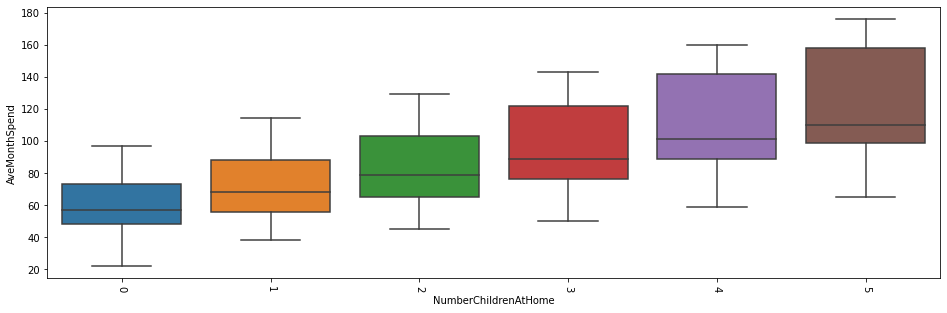

In [14]:
#NumberChildrenAtHome v.s AveMonthSpend
plt.figure(figsize=(16,5))
plt.xticks(rotation = -90)
sns.boxplot(x='NumberChildrenAtHome',y='AveMonthSpend',data=traindata)

In [15]:
# 建立新欄'Occupation' 轉換dummy
New_columns = pd.get_dummies(traindata['Occupation'])

New_columns

,Clerical,Management,Manual,Professional,Skilled Manual
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
16744,1,0,0,0,0
16745,1,0,0,0,0
16746,1,0,0,0,0
16747,1,0,0,0,0


In [16]:
# 轉換Gender, MaritalStatus
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

traindata['Gender']=lb.fit_transform(traindata['Gender'])
traindata['MaritalStatus']=lb.fit_transform(traindata['MaritalStatus'])
traindata

,CustomerID,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,AveMonthSpend
0,11000,Rockhampton,Queensland,Australia,Bachelors,Professional,1,0,0,0,2,137947,32,89
1,11001,Seaford,Victoria,Australia,Bachelors,Professional,1,1,1,3,3,101141,33,117
2,11002,Hobart,Tasmania,Australia,Bachelors,Professional,1,0,1,3,3,91945,33,123
3,11003,North Ryde,New South Wales,Australia,Bachelors,Professional,0,1,1,0,0,86688,30,50
4,11004,Wollongong,New South Wales,Australia,Bachelors,Professional,0,1,4,5,5,92771,30,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,29478,Stoke-on-Trent,England,United Kingdom,Graduate Degree,Clerical,1,1,0,0,3,45986,39,65
16745,29479,Versailles,Yveline,France,Graduate Degree,Clerical,1,0,0,0,1,80049,40,77
16746,29480,London,England,United Kingdom,Graduate Degree,Clerical,0,1,0,0,3,60417,38,48
16747,29481,Hof,Bayern,Germany,Graduate Degree,Clerical,1,1,0,0,3,66653,38,65


In [17]:
traindata['Education'].unique()

array(['Bachelors ', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [18]:
# 'Education'轉換成有序編碼
Edu_mapping = {'Partial High School': 1,
                'High School': 2,
                'Partial College': 3,
                'Bachelors ': 4,
                'Graduate Degree' : 5}

traindata ['Education'] = traindata ['Education'].map(Edu_mapping)
traindata

,CustomerID,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,AveMonthSpend
0,11000,Rockhampton,Queensland,Australia,4,Professional,1,0,0,0,2,137947,32,89
1,11001,Seaford,Victoria,Australia,4,Professional,1,1,1,3,3,101141,33,117
2,11002,Hobart,Tasmania,Australia,4,Professional,1,0,1,3,3,91945,33,123
3,11003,North Ryde,New South Wales,Australia,4,Professional,0,1,1,0,0,86688,30,50
4,11004,Wollongong,New South Wales,Australia,4,Professional,0,1,4,5,5,92771,30,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,29478,Stoke-on-Trent,England,United Kingdom,5,Clerical,1,1,0,0,3,45986,39,65
16745,29479,Versailles,Yveline,France,5,Clerical,1,0,0,0,1,80049,40,77
16746,29480,London,England,United Kingdom,5,Clerical,0,1,0,0,3,60417,38,48
16747,29481,Hof,Bayern,Germany,5,Clerical,1,1,0,0,3,66653,38,65


In [19]:
# YearlyIncome 標準化
cols = ['YearlyIncome']
X = traindata[cols]
scaler = StandardScaler()
scaler.fit(X) # 產生 X 的平均值和標準差

print(scaler.mean_,scaler.var_)

X_std = scaler.fit_transform(X) # 特徵標準化
traindata['YearlyIncome_std'] = X_std
X_std

[78159.38887876] [1.57748316e+09]


array([[ 1.50532001],
       [ 0.57862621],
       [ 0.34709124],
       ...,
       [-0.44671417],
       [-0.28970546],
       [-0.46386024]])

In [20]:
# # AveMonthSpend 標準化
# cols = ['AveMonthSpend']
# X = traindata[cols]
# scaler = StandardScaler()
# scaler.fit(X) # 產生 X 的平均值和標準差

# print(scaler.mean_,scaler.var_)

# X_std = scaler.fit_transform(X) # 特徵標準化
# traindata['AveMonthSpend_std'] 

Text(0, 0.5, 'YearlyIncome_std')

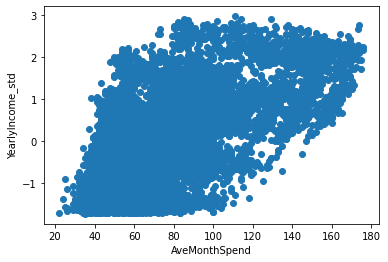

In [21]:
# AveMonthSpend 和YearlyIncome_std 散佈圖

# AveMonthSpend.shape,YearlyIncome_std.shape

plt.scatter(traindata['AveMonthSpend'], traindata['YearlyIncome_std'])
plt.xlabel('AveMonthSpend')
plt.ylabel('YearlyIncome_std')

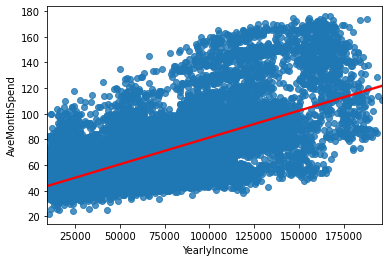

In [22]:
sns.regplot(y='AveMonthSpend' , x='YearlyIncome' ,data=traindata,line_kws={"color": 'red'})

In [23]:

parts = traindata[['AveMonthSpend','Education','Age','TotalChildren','NumberCarsOwned','Gender','MaritalStatus','NumberChildrenAtHome','YearlyIncome_std']]
# 與 Dummy New_columns合併
totaldata = pd.concat([parts,New_columns], axis=1)#左右合併

totaldata['Age_square'] = totaldata['Age']**2
totaldata['YearlyIncome_std_square'] = totaldata['YearlyIncome_std']**2
print(totaldata.dtypes)
totaldata

AveMonthSpend                int64
Education                    int64
Age                          int64
TotalChildren                int64
NumberCarsOwned              int64
Gender                       int32
MaritalStatus                int32
NumberChildrenAtHome         int64
YearlyIncome_std           float64
Clerical                     uint8
Management                   uint8
Manual                       uint8
Professional                 uint8
Skilled Manual               uint8
Age_square                   int64
YearlyIncome_std_square    float64
dtype: object


,AveMonthSpend,Education,Age,TotalChildren,NumberCarsOwned,Gender,MaritalStatus,NumberChildrenAtHome,YearlyIncome_std,Clerical,Management,Manual,Professional,Skilled Manual,Age_square,YearlyIncome_std_square
0,89,4,32,2,0,1,0,0,1.505320,0,0,0,1,0,1024,2.265988
1,117,4,33,3,1,1,1,3,0.578626,0,0,0,1,0,1089,0.334808
2,123,4,33,3,1,1,0,3,0.347091,0,0,0,1,0,1089,0.120472
3,50,4,30,0,1,0,1,0,0.214732,0,0,0,1,0,900,0.046110
4,95,4,30,5,4,0,1,5,0.367888,0,0,0,1,0,900,0.135342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,65,5,39,3,0,1,1,0,-0.810055,1,0,0,0,0,1521,0.656189
16745,77,5,40,1,0,1,0,0,0.047576,1,0,0,0,0,1600,0.002263
16746,48,5,38,3,0,0,1,0,-0.446714,1,0,0,0,0,1444,0.199554
16747,65,5,38,3,0,1,1,0,-0.289705,1,0,0,0,0,1444,0.083929


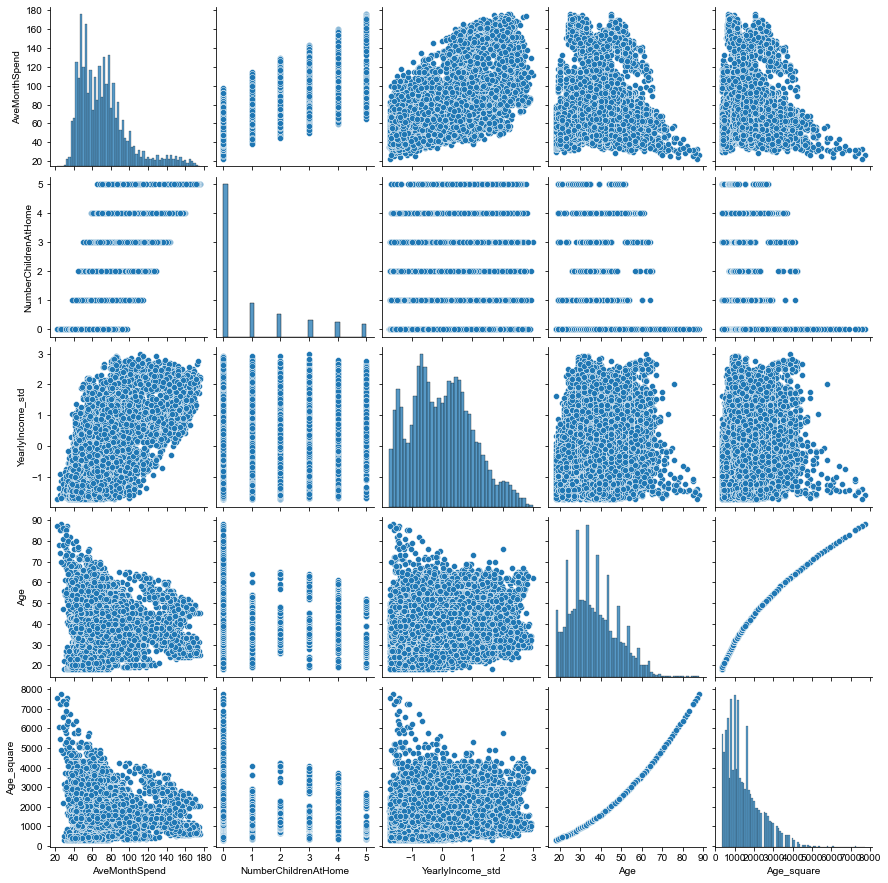

In [24]:
cols = ['AveMonthSpend'
#         ,'NumberCarsOwned'
        ,'NumberChildrenAtHome'
#         , 'TotalChildren'
        , 'YearlyIncome_std'
        , 'Age','Age_square']
sns.pairplot(totaldata[cols])
sns.set(font_scale =0.5)

In [25]:
# 建立模型  使用標準化的YearlyIncome_std

y = totaldata.iloc[:,0]
X = totaldata.iloc[:, 2 : ]

from sklearn.linear_model import LinearRegression

#分拆數據集
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42 )

#創建線性回歸
lin_mod = LinearRegression()
lin_mod.fit(X_train,y_train)

print(lin_mod.intercept_)
print(lin_mod.coef_)
print(lin_mod.score(X_train,y_train))
print(lin_mod.score(X_valid, y_valid))
np.set_printoptions(suppress=True)
X.columns

38.222731018407316
[ 7.27575702e-01  1.28648850e-01 -4.37579906e-03  2.82684501e+01
 -6.11426508e+00  1.07367724e+01  7.14597124e+00  3.77139147e-01
 -8.62896942e-01 -1.72760885e+00  1.27512471e+00  9.38241937e-01
 -1.07532021e-02  6.09438242e-01]
0.9492654886469897
0.9526390366963914


Index(['Age', 'TotalChildren', 'NumberCarsOwned', 'Gender', 'MaritalStatus',
       'NumberChildrenAtHome', 'YearlyIncome_std', 'Clerical', 'Management',
       'Manual', 'Professional', 'Skilled Manual', 'Age_square',
       'YearlyIncome_std_square'],
      dtype='object')

In [26]:
r2 = 0.9492654886469897
r2_adj = 1 - ((1 - r2) * ((y.shape[0] - 1)/(y.shape[0] - 10)) )
print('R^2  is: ' + str(r2))
print('Adjusted R^2  is: ' + str(r2_adj))

R^2  is: 0.9492654886469897
Adjusted R^2  is: 0.9492377227240845


In [27]:
Y_hat = lin_mod.predict(X)

In [28]:
residuals = y - Y_hat

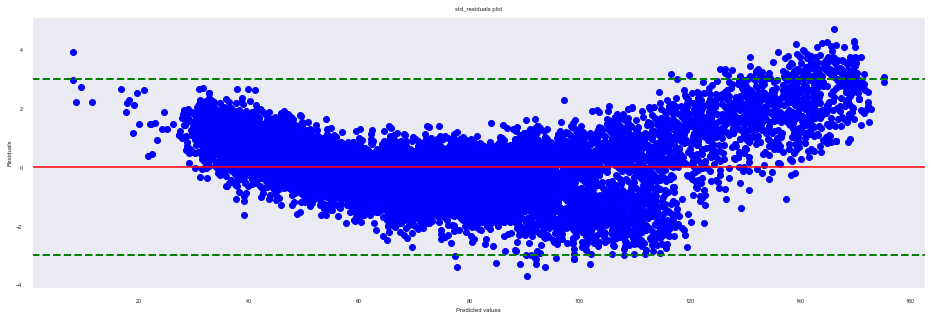

In [29]:
#殘差圖
plt.figure(figsize =(16,5))
from sklearn import preprocessing
std_residuals = preprocessing.scale(residuals) # 殘差標準化
residual_scatter_plot = plt.scatter(Y_hat, std_residuals, color='blue', marker='o')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('std_residuals plot')
plt.axhline(0, color='red')
plt.axhline(3, color='green', linestyle='dashed', linewidth=2)
plt.axhline(-3, color='green', linestyle='dashed', linewidth=2)
plt.grid()
plt.show()

In [30]:
#變數與月消費的相關性 做成表格
import numpy as np
np.set_printoptions(suppress=True) # 科學記號改為一般顯示方式

new_coef= pd.DataFrame(lin_mod.coef_,X.columns, columns=['coef']) 
new_coef

,coef
Age,0.727576
TotalChildren,0.128649
NumberCarsOwned,-0.004376
Gender,28.268450
MaritalStatus,-6.114265
NumberChildrenAtHome,10.736772
YearlyIncome_std,7.145971
Clerical,0.377139
Management,-0.862897
Manual,-1.727609


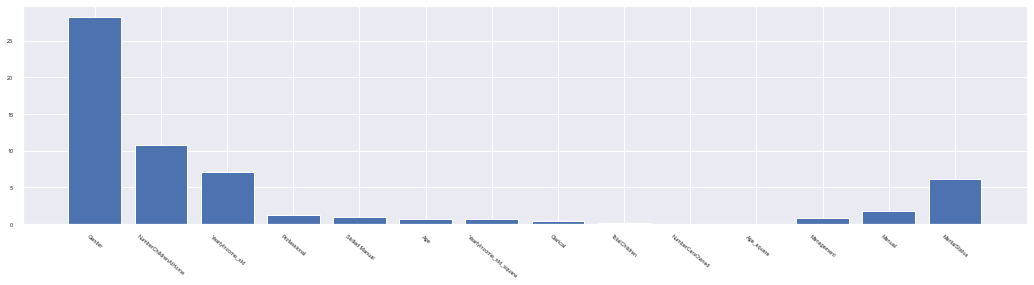

,coef
Gender,28.268450
NumberChildrenAtHome,10.736772
YearlyIncome_std,7.145971
Professional,1.275125
Skilled Manual,0.938242
Age,0.727576
YearlyIncome_std_square,0.609438
Clerical,0.377139
TotalChildren,0.128649
NumberCarsOwned,-0.004376


In [31]:
#特徵重要性排序 vs月消費

new_coef_sort = new_coef.sort_values(by='coef', ascending=False)

plt.figure(figsize=(18, 4))
plt.bar(new_coef_sort.index , abs(new_coef_sort['coef']))
plt.xticks(rotation=-40)
plt.show()
new_coef_sort

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [33]:
selector.estimator_.coef_

array([-1.05450214, 16.0773549 ,  0.31778476, 11.17661623, -1.45062731])

In [34]:
selector.threshold_

6.015377065726383

In [35]:
selector.get_support(), totaldata.columns[2:]

(array([False,  True, False,  True, False]),
 Index(['Age', 'TotalChildren', 'NumberCarsOwned', 'Gender', 'MaritalStatus',
        'NumberChildrenAtHome', 'YearlyIncome_std', 'Clerical', 'Management',
        'Manual', 'Professional', 'Skilled Manual', 'Age_square',
        'YearlyIncome_std_square'],
       dtype='object'))

In [36]:
totaldata.columns[2:][selector.get_support()]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 5

In [37]:
cols=['Gender', 'MaritalStatus', 'NumberChildrenAtHome', 'YearlyIncome_std']
#創建篩選最佳特徵之線性回歸
lm = LinearRegression()
lm.fit(X_train[cols],y_train)
Y_hat_2 = lm.predict(X_test[cols])
Y_hat_2
residuals = Y_hat_2 - y_test

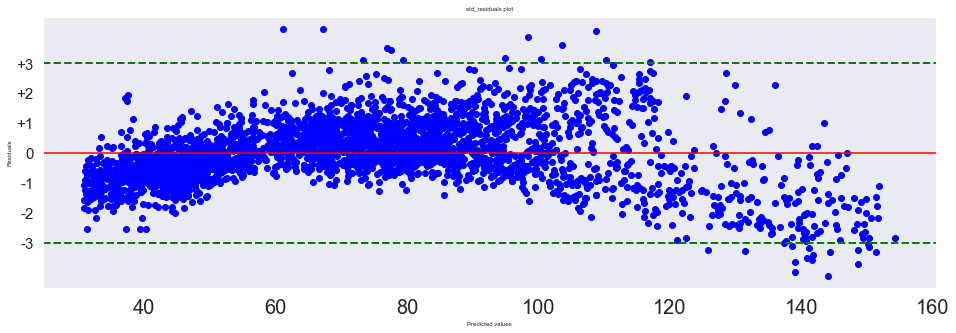

In [38]:
#殘差圖
plt.figure(figsize =(16,5))
from sklearn import preprocessing
std_residuals = preprocessing.scale(residuals) # 殘差標準化
residual_scatter_plot = plt.scatter(Y_hat_2, std_residuals, color='blue', marker='o')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('std_residuals plot')
plt.axhline(0, color='red')
plt.axhline(3, color='green', linestyle='dashed', linewidth=2)
plt.axhline(-3, color='green', linestyle='dashed', linewidth=2)
plt.xticks(fontsize=20)
plt.yticks([-3,-2,-1,0,1,2,3],['-3','-2','-1','0','+1','+2','+3'], fontsize=15) # 加上刻度標示
plt.grid()
plt.show()

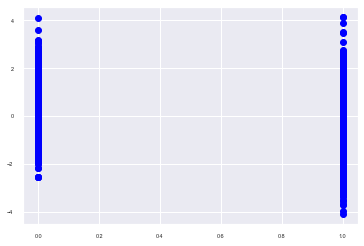

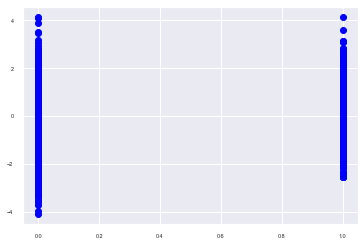

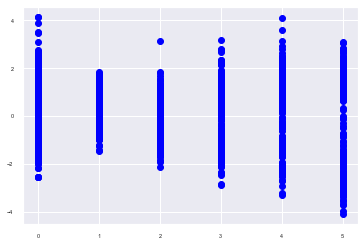

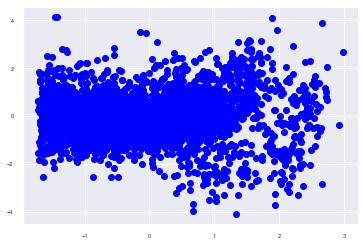

In [39]:
for i in cols:
    plt.scatter(X_test[i],std_residuals , color='blue', marker='o')
    plt.show()

In [40]:
# model by 2階模型
cols=['Gender', 'MaritalStatus', 'NumberChildrenAtHome', 'YearlyIncome_std']
#創建篩選最佳特徵之二階回歸
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(X_train[cols])
quad = LinearRegression()
quad.fit(Z_pr, y_train) # 創建二階回歸模型
Z_pr_test=pr.fit_transform(X_test[cols])

Y_hat_3 = quad.predict(Z_pr_test)# 預測值

residuals = Y_hat_3 - y_test #殘差
Z_pr_test

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.        ,  0.5561067 ],
       [ 1.        ,  1.        ,  1.        , ...,  0.        ,
        -0.        ,  0.4510157 ],
       [ 1.        ,  0.        ,  1.        , ...,  1.        ,
         2.1480335 ,  4.6140479 ],
       ...,
       [ 1.        ,  1.        ,  1.        , ...,  0.        ,
        -0.        ,  0.01267986],
       [ 1.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.73207638],
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.00310626]])

In [69]:
# 2階模型的各項係數
import numpy as np
#修改資料呈現方式
# np.set_printoptions(suppress=True)
new_coef= pd.DataFrame(quad.coef_, columns=['coef']) 
print('intercept_ is',quad.intercept_)
new_coef
#print(quad.intercept_,quad.coef_)

intercept_ is 51.27825310840973


,coef
0,0.000000e+00
1,1.195544e+13
2,-8.325183e+11
3,9.105957e+00
4,4.703857e+00
5,-1.195544e+13
6,-2.761230e+00
7,5.188843e+00
8,3.451706e+00
9,8.325183e+11


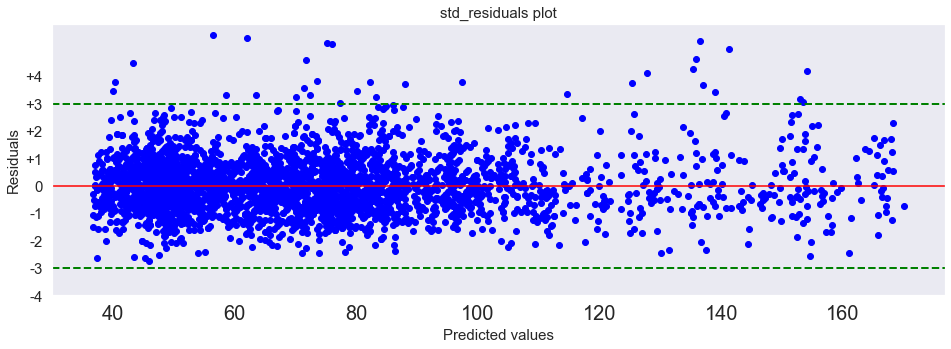

In [42]:
#標準化殘差圖
plt.figure(figsize =(16,5))
from sklearn import preprocessing
std_residuals = preprocessing.scale(residuals) # 殘差標準化
residual_scatter_plot = plt.scatter(Y_hat_3, std_residuals, color='blue', marker='o')
plt.xlabel('Predicted values', fontsize=15)
plt.ylabel('Residuals',fontsize=15)
plt.title('std_residuals plot', fontsize=15)
plt.axhline(0, color='red')
plt.axhline(3, color='green', linestyle='dashed', linewidth=2)
plt.axhline(-3, color='green', linestyle='dashed', linewidth=2)
plt.xticks(fontsize=20)
plt.yticks([-4,-3,-2,-1,0,1,2,3,4],['-4','-3','-2','-1','0','+1','+2','+3','+4'], fontsize=15) # 加上刻度標示
plt.grid()
plt.show()

# K fold 

In [43]:
# K fold & SelectFromModel
from sklearn.model_selection import cross_val_score
selector = SelectFromModel(estimator=LinearRegression()).fit(X_train, y_train)
lm = LinearRegression()

scores = cross_val_score(lm, selector.transform(X_train), y_train, scoring='r2', cv=5)
#cv5 = 交叉驗證為5等分
scores,scores.mean()

(array([0.94343915, 0.94027236, 0.94142489, 0.94198799, 0.9407793 ]),
 0.9415807379759331)

# Quadratic Model Evaluation 

In [44]:
#自己算出 R2/MSE  for test
#算出 R2/MSE
from sklearn.metrics import r2_score,mean_squared_error

In [45]:
Y_hat_3.shape,y_test.shape

((3291,), (3291,))

In [46]:
r2 = r2_score(Y_hat_3 , y_test)
print('The R-square value is: ', r2)
r2_adj = 1 - ((1 - r2) * ((y.shape[0] - 1)/(y.shape[0] - 15)) )
print('Adjusted R^2  is: ' + str(r2_adj))
print('MSE  is: ' + str(mean_squared_error(Y_hat_3,y_test)))

The R-square value is:  0.977496540786488
Adjusted R^2  is: 0.9774773772567441
MSE  is: 16.53360886820256


# 挑出兩兩係數相乘最高

In [65]:
#挑出係數最高的4個 兩兩相乘
coef_Gender=new_coef_sort.iloc[0]
coef_NumberChildrenAtHome=new_coef_sort.iloc[1]
coef_YearlyIncome_std=new_coef_sort.iloc[2]
coef_MaritalStatus=new_coef_sort.iloc[3]

In [66]:
new_coef_sort

,coef
Gender,28.268450
NumberChildrenAtHome,10.736772
YearlyIncome_std,7.145971
Professional,1.275125
Skilled Manual,0.938242
Age,0.727576
YearlyIncome_std_square,0.609438
Clerical,0.377139
TotalChildren,0.128649
NumberCarsOwned,-0.004376


In [75]:
traindata['Gender_NumberChildrenAtHome'] = traindata.Gender * traindata.NumberChildrenAtHome
traindata['Gender_YearlyIncome_std'] = traindata.Gender * traindata.YearlyIncome_std
traindata['Gender_MaritalStatus'] = traindata.Gender * traindata.YearlyIncome_std
traindata['NumberChildrenAtHome_YearlyIncome_std'] = traindata.NumberChildrenAtHome * traindata.YearlyIncome_std
traindata['NumberChildrenAtHome_MaritalStatus'] = traindata.NumberChildrenAtHome * traindata.MaritalStatus
traindata['YearlyIncome_std_MaritalStatus'] = traindata.YearlyIncome_std * traindata.MaritalStatus

# Gender_NumberChildrenAtHome,Gender_YearlyIncome_std,Gender_MaritalStatus,NumberChildrenAtHome_YearlyIncome_std,NumberChildrenAtHome_MaritalStatus,YearlyIncome_std_MaritalStatus

# pairwise coef model

In [78]:
parts = traindata[['AveMonthSpend','Education','Age','TotalChildren','NumberCarsOwned','Gender','MaritalStatus','NumberChildrenAtHome','YearlyIncome_std','Gender_NumberChildrenAtHome','Gender_YearlyIncome_std','Gender_MaritalStatus','NumberChildrenAtHome_YearlyIncome_std','NumberChildrenAtHome_MaritalStatus','YearlyIncome_std_MaritalStatus']]
# 與 Dummy New_columns合併
totaldata = pd.concat([parts,New_columns], axis=1)#左右合併

totaldata['Age_square'] = totaldata['Age']**2
totaldata['YearlyIncome_std_square'] = totaldata['YearlyIncome_std']**2
print(totaldata.dtypes)
totaldata

AveMonthSpend                              int64
Education                                  int64
Age                                        int64
TotalChildren                              int64
NumberCarsOwned                            int64
Gender                                     int32
MaritalStatus                              int32
NumberChildrenAtHome                       int64
YearlyIncome_std                         float64
Gender_NumberChildrenAtHome                int64
Gender_YearlyIncome_std                  float64
Gender_MaritalStatus                     float64
NumberChildrenAtHome_YearlyIncome_std    float64
NumberChildrenAtHome_MaritalStatus         int64
YearlyIncome_std_MaritalStatus           float64
Clerical                                   uint8
Management                                 uint8
Manual                                     uint8
Professional                               uint8
Skilled Manual                             uint8
Age_square          

,AveMonthSpend,Education,Age,TotalChildren,NumberCarsOwned,Gender,MaritalStatus,NumberChildrenAtHome,YearlyIncome_std,Gender_NumberChildrenAtHome,...,NumberChildrenAtHome_YearlyIncome_std,NumberChildrenAtHome_MaritalStatus,YearlyIncome_std_MaritalStatus,Clerical,Management,Manual,Professional,Skilled Manual,Age_square,YearlyIncome_std_square
0,89,4,32,2,0,1,0,0,1.505320,0,...,0.000000,0,0.000000,0,0,0,1,0,1024,2.265988
1,117,4,33,3,1,1,1,3,0.578626,3,...,1.735879,3,0.578626,0,0,0,1,0,1089,0.334808
2,123,4,33,3,1,1,0,3,0.347091,3,...,1.041274,0,0.000000,0,0,0,1,0,1089,0.120472
3,50,4,30,0,1,0,1,0,0.214732,0,...,0.000000,0,0.214732,0,0,0,1,0,900,0.046110
4,95,4,30,5,4,0,1,5,0.367888,0,...,1.839440,5,0.367888,0,0,0,1,0,900,0.135342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,65,5,39,3,0,1,1,0,-0.810055,0,...,-0.000000,0,-0.810055,1,0,0,0,0,1521,0.656189
16745,77,5,40,1,0,1,0,0,0.047576,0,...,0.000000,0,0.000000,1,0,0,0,0,1600,0.002263
16746,48,5,38,3,0,0,1,0,-0.446714,0,...,-0.000000,0,-0.446714,1,0,0,0,0,1444,0.199554
16747,65,5,38,3,0,1,1,0,-0.289705,0,...,-0.000000,0,-0.289705,1,0,0,0,0,1444,0.083929


In [82]:
#'Gender' vs 'NumberChildrenAtHome'
cols=['Gender','NumberChildrenAtHome','Gender_NumberChildrenAtHome']
#創建篩選最佳特徵之線性回歸
lm = LinearRegression()
lm.fit(totaldata[cols],y)
Y_hat_2 = lm.predict(totaldata[cols])
Y_hat_2
residuals = Y_hat_2 - y

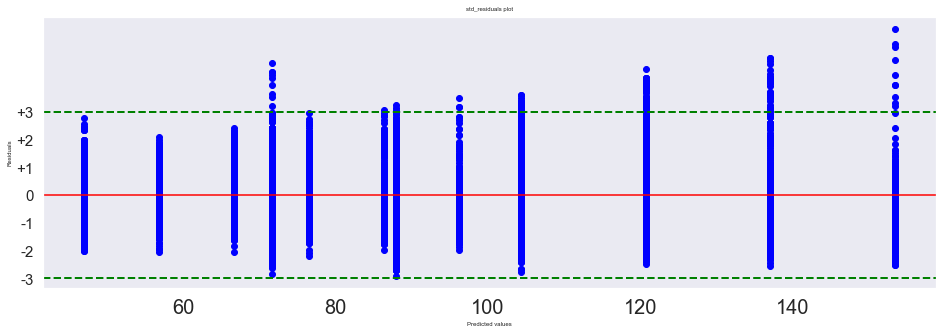

In [83]:
#殘差圖
plt.figure(figsize =(16,5))
from sklearn import preprocessing
std_residuals = preprocessing.scale(residuals) # 殘差標準化
residual_scatter_plot = plt.scatter(Y_hat_2, std_residuals, color='blue', marker='o')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('std_residuals plot')
plt.axhline(0, color='red')
plt.axhline(3, color='green', linestyle='dashed', linewidth=2)
plt.axhline(-3, color='green', linestyle='dashed', linewidth=2)
plt.xticks(fontsize=20)
plt.yticks([-3,-2,-1,0,1,2,3],['-3','-2','-1','0','+1','+2','+3'], fontsize=15) # 加上刻度標示
plt.grid()
plt.show()

In [88]:
#'Gender' vs 'YearlyIncome_std'
cols=['Gender','YearlyIncome_std','Gender_YearlyIncome_std']
#創建篩選最佳特徵之線性回歸
lm = LinearRegression()
lm.fit(totaldata[cols],y)
Y_hat_2 = lm.predict(totaldata[cols])
Y_hat_2
residuals = Y_hat_2 - y

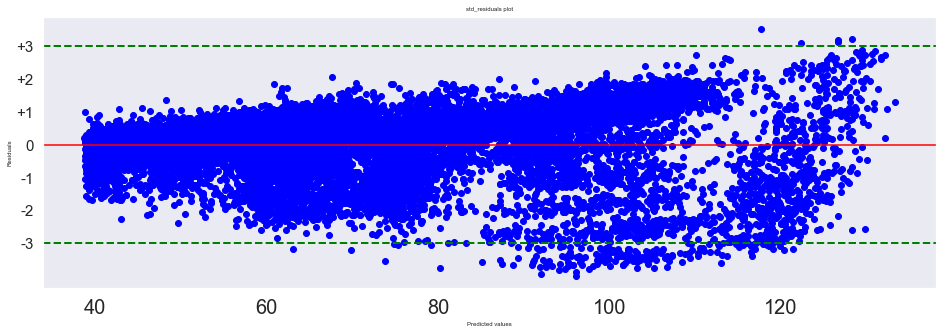

In [89]:
#殘差圖
plt.figure(figsize =(16,5))
from sklearn import preprocessing
std_residuals = preprocessing.scale(residuals) # 殘差標準化
residual_scatter_plot = plt.scatter(Y_hat_2, std_residuals, color='blue', marker='o')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('std_residuals plot')
plt.axhline(0, color='red')
plt.axhline(3, color='green', linestyle='dashed', linewidth=2)
plt.axhline(-3, color='green', linestyle='dashed', linewidth=2)
plt.xticks(fontsize=20)
plt.yticks([-3,-2,-1,0,1,2,3],['-3','-2','-1','0','+1','+2','+3'], fontsize=15) # 加上刻度標示
plt.grid()
plt.show()

In [92]:
# Gender vs MaritalStatus
cols=['Gender' , 'MaritalStatus','Gender_MaritalStatus']
#創建篩選最佳特徵之線性回歸
lm = LinearRegression()
lm.fit(totaldata[cols],y)
Y_hat_2 = lm.predict(totaldata[cols])
Y_hat_2
residuals = Y_hat_2 - y

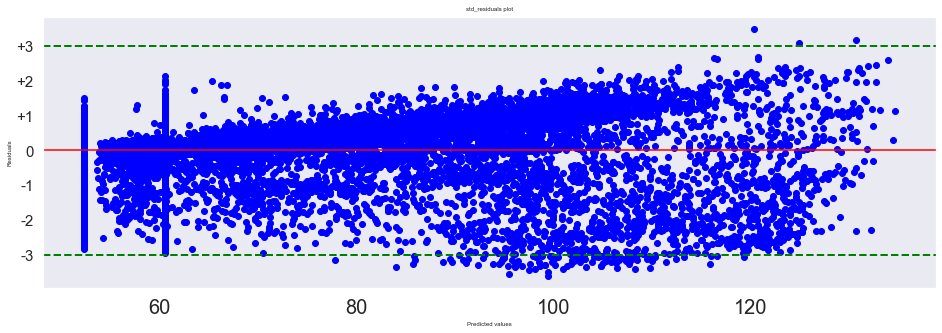

In [93]:
#殘差圖
plt.figure(figsize =(16,5))
from sklearn import preprocessing
std_residuals = preprocessing.scale(residuals) # 殘差標準化
residual_scatter_plot = plt.scatter(Y_hat_2, std_residuals, color='blue', marker='o')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('std_residuals plot')
plt.axhline(0, color='red')
plt.axhline(3, color='green', linestyle='dashed', linewidth=2)
plt.axhline(-3, color='green', linestyle='dashed', linewidth=2)
plt.xticks(fontsize=20)
plt.yticks([-3,-2,-1,0,1,2,3],['-3','-2','-1','0','+1','+2','+3'], fontsize=15) # 加上刻度標示
plt.grid()
plt.show()

In [94]:
#NumberChildrenAtHome vs YearlyIncome_std
cols=['NumberChildrenAtHome' , 'YearlyIncome_std','NumberChildrenAtHome_YearlyIncome_std']
#創建篩選最佳特徵之線性回歸
lm = LinearRegression()
lm.fit(totaldata[cols],y)
Y_hat_2 = lm.predict(totaldata[cols])
Y_hat_2
residuals = Y_hat_2 - y

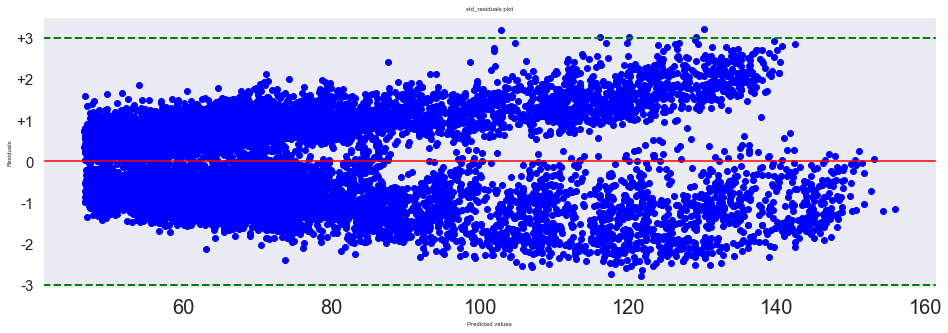

In [95]:
#殘差圖
plt.figure(figsize =(16,5))
from sklearn import preprocessing
std_residuals = preprocessing.scale(residuals) # 殘差標準化
residual_scatter_plot = plt.scatter(Y_hat_2, std_residuals, color='blue', marker='o')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('std_residuals plot')
plt.axhline(0, color='red')
plt.axhline(3, color='green', linestyle='dashed', linewidth=2)
plt.axhline(-3, color='green', linestyle='dashed', linewidth=2)
plt.xticks(fontsize=20)
plt.yticks([-3,-2,-1,0,1,2,3],['-3','-2','-1','0','+1','+2','+3'], fontsize=15) # 加上刻度標示
plt.grid()
plt.show()

In [96]:
#NumberChildrenAtHome vs MaritalStatus
cols=['NumberChildrenAtHome' , 'MaritalStatus','NumberChildrenAtHome_MaritalStatus']
#創建篩選最佳特徵之線性回歸
lm = LinearRegression()
lm.fit(totaldata[cols],y)
Y_hat_2 = lm.predict(totaldata[cols])
Y_hat_2
residuals = Y_hat_2 - y

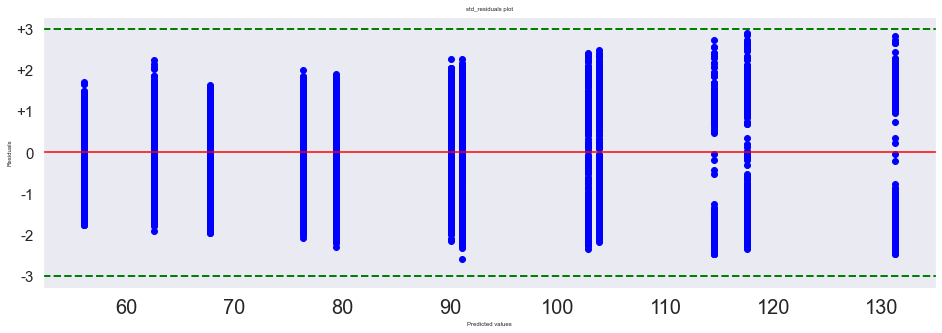

In [97]:
#殘差圖
plt.figure(figsize =(16,5))
from sklearn import preprocessing
std_residuals = preprocessing.scale(residuals) # 殘差標準化
residual_scatter_plot = plt.scatter(Y_hat_2, std_residuals, color='blue', marker='o')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('std_residuals plot')
plt.axhline(0, color='red')
plt.axhline(3, color='green', linestyle='dashed', linewidth=2)
plt.axhline(-3, color='green', linestyle='dashed', linewidth=2)
plt.xticks(fontsize=20)
plt.yticks([-3,-2,-1,0,1,2,3],['-3','-2','-1','0','+1','+2','+3'], fontsize=15) # 加上刻度標示
plt.grid()
plt.show()

In [98]:
#YearlyIncome_std vs MaritalStatus
cols=['YearlyIncome_std' , 'MaritalStatus','YearlyIncome_std_MaritalStatus']
#創建篩選最佳特徵之線性回歸
lm = LinearRegression()
lm.fit(totaldata[cols],y)
Y_hat_2 = lm.predict(totaldata[cols])
Y_hat_2
residuals = Y_hat_2 - y

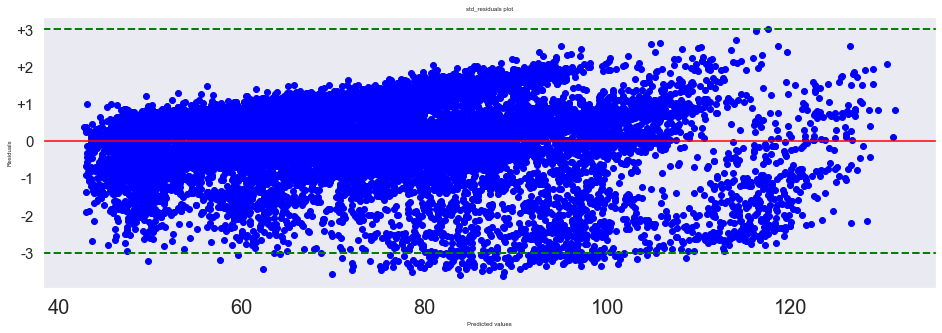

In [99]:
#殘差圖
plt.figure(figsize =(16,5))
from sklearn import preprocessing
std_residuals = preprocessing.scale(residuals) # 殘差標準化
residual_scatter_plot = plt.scatter(Y_hat_2, std_residuals, color='blue', marker='o')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('std_residuals plot')
plt.axhline(0, color='red')
plt.axhline(3, color='green', linestyle='dashed', linewidth=2)
plt.axhline(-3, color='green', linestyle='dashed', linewidth=2)
plt.xticks(fontsize=20)
plt.yticks([-3,-2,-1,0,1,2,3],['-3','-2','-1','0','+1','+2','+3'], fontsize=15) # 加上刻度標示
plt.grid()
plt.show()

In [63]:
#自己匯入並估計500筆 from customer_test.csv 
# 依照最終模式需要的特徵做轉換(文字轉數字,  一階轉二階)
#自己匯入answer_customer_test.csv並算出 R2/MSE for 500筆

In [64]:
quad.fit?